In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom
from nilearn import image
import sys
from torch.utils.data import dataset
import torch
from tqdm import tqdm_notebook as tqdm

In [3]:
data_dir = "IXI-T1"
scans = os.listdir(data_dir)
print(len(scans))

581


In [ ]:
# dataset = []
# target_shape = [256,256,150]
# new_resolution = np.array([2,2,2])
# new_affine = np.zeros((4,4))
# new_affine[:3,:3] = np.diag(new_resolution)
# new_affine[:3,3] = target_shape*new_resolution/2.*-1
# new_affine[3,3] = 1.
# print(new_affine)
# for scan in scans[:1]:
#     fname = os.path.join(data_dir,scan)
#     inp = nib.load(fname)
# #     old_affine = inp.affine
# #     inp = image.resample_img(inp,target_shape=[128,128,128],target_affine = old_affine)
# #     old_affine = inp.affine
# # #     new_affine = np.array([[2,0,0,0],
# # #                            [0,2,0,0],
# # #                            [0,0,2,0],
# # #                            [0,0,0,1]])
# #     new_affine = old_affine *2
#     red = image.resample_img(inp,target_affine = new_affine,interpolation="nearest")
# # #     red = image.resample_img(red,target_shape=[256,256,150],target_affine = np.eye(4))
#     inp_np = inp.get_fdata()
#     res_np = red.get_fdata()
    

# # print(nib.affines.voxel_sizes(old_affine))

# print(nib.affines.voxel_sizes(new_affine))

1.0


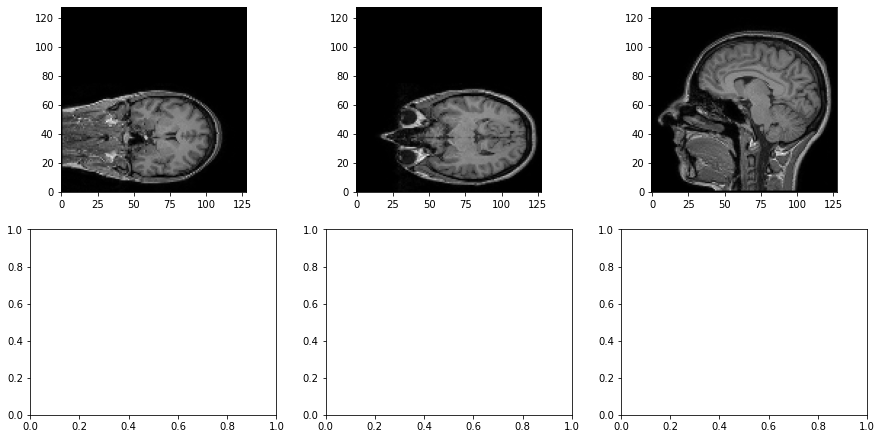

In [17]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(len(slices), len(slices[0]))
    fig.set_size_inches(15,7.5)
    for row in range(len(slices)):
        for column in range(len(slices[0])):
            axes[row][column].imshow(slices[row][column].T, cmap="gray", origin="lower")

inp_np = inp_np/np.max(inp_np.numpy())

print(np.max(inp_np.numpy()))

slice_0 = inp_np[int(inp_np.shape[0]/2), :, :]
slice_1 = inp_np[:, int(inp_np.shape[1]/2), :]
slice_2 = inp_np[:, :, int(inp_np.shape[2]/3.2)]
nslice_0 = res_np[int(res_np.shape[0]/2), :, :]
nslice_1 = res_np[:, int(res_np.shape[1]/2), :]
nslice_2 = res_np[:, :, int(res_np.shape[2]/3.2)]
show_slices([[slice_0, slice_1, slice_2],
             [nslice_0, nslice_1, nslice_2]])
# plt.suptitle("Center slices for EPI image")

In [5]:
for scan in scans[-2:-1]:
    fname = os.path.join(data_dir,scan)
    inp = nib.load(fname)
    
    old_affine = inp.affine 
    new_affine = old_affine*2 
    inp = image.resample_img(inp,target_affine = new_affine,target_shape=[128,128,128],interpolation = "continuous")
    update1 = inp.affine *2
    red = image.resample_img(inp,target_affine = update1,interpolation='nearest')
    update2 = red.affine/2
    red = image.resample_img(red,target_affine=update2,target_shape = [128,128,128],interpolation = "nearest")

    inp_np = inp.get_fdata()
    res_np = red.get_fdata()
    

    
#     zoom_scale = [0.5,0.5,128/150]
#     inp_np = zoom(inp_np,zoom_scale)
#     zoom_scale = zoom_scale*2
#     print(res_np.shape)
#     res_np =zoom(res_np,zoom_scale)

d:\program files\python37\lib\site-packages\nilearn\image\resampling.py:513: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [6]:
model = torch.load("first_training_ADAM_10EPOCHS.pth")
model = model.to("cuda")

for scan in scans[:1]:
    fname = os.path.join(data_dir,scan)
    inp = nib.load(fname)
    
    old_affine = inp.affine 
    new_affine = old_affine*2 
    inp = image.resample_img(inp,target_affine = new_affine,target_shape=[128,128,128],interpolation = "continuous")
    inp_np = torch.from_numpy(np.expand_dims(np.expand_dims(inp.get_fdata(),axis = 0),axis=0)).type(torch.float).cuda()
    
    res_np = model(inp_np)
    
    inp_np = inp_np.to("cpu")
    res_np = res_np.to("cpu")
    

d:\program files\python37\lib\site-packages\nilearn\image\resampling.py:513: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [7]:
inp_np = torch.squeeze(inp_np)
res_np = torch.squeeze(res_np).detach().numpy()


print(inp_np.shape)
print(res_np.shape)

torch.Size([128, 128, 128])
(128, 128, 128)
